# PCA

In [86]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [87]:
class PCA:

    def __init__(self, n_components = 0, correlation=False):
        self.n_components = n_components
        self.correlation = correlation
        self.PCAs = None
        self.mean = None
        
    
    def fit(self,X):
        #mean/std along the first axis so mean/std wrt the features or columns
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
        #if we want to work with standardize data use correlation = True
        #and use the correlation matri instead of the covariance
        if self.correlation:
            X = (X - self.mean) / self.std
        else :
            X = X - self.mean 
        
        Sigma = np.cov(X.T)

        #Find eigenvalue and eigenvector of the covaraince/correlation matrix
        eigenvalues, eigenvectors = np.linalg.eig(Sigma)
        
        #eigenvector are returned as column vector v[:,i] so invert them
        eigenvectors = eigenvectors.T
        
        
        #sort from the bigger to the smaller--> revers a list
        idx_eigenvalue_sort = np.argsort(eigenvalues)[::-1] 
        self.eigenvalues = eigenvalues[idx_eigenvalue_sort]
        self.eigenvectors = eigenvectors[idx_eigenvalue_sort]
        
        #if the number of pca wanted is not specified , use the thumb rule to establish a good number of PCAs
        K = self._rule_of_thum(X)
        self.PCAs = eigenvectors[0:K]

    def _rule_of_thum(self,X):
        if self.n_components==0:
            K = 0
            total_variance = np.sum(self.eigenvalues)
            for i in range(len(self.eigenvalues)):
                if np.sum(self.eigenvalues[:i]) >= (total_variance*0.8):
                    return K
                else :
                    K += 1
     
        else :
            K = self.n_components
        return K
    
    def transform(self,X):
        X = X - self.mean 
        return np.dot(X, self.PCAs.T)

In [88]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

#data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

#find the PCA and project the data
pca = PCA()
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)


Shape of X: (150, 4)
Shape of transformed X: (150, 1)


we can see that in this case 1 principal component is enough to explain more than 80% of the total variability.
Now we try to use 2 principal component and plot the result.

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


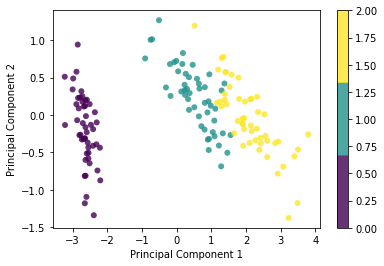

In [89]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()